Untersuche die Wirkung der Inhibitoren JD359 und BH267.meta auf den Influx von Lactat durch PfFNT über ilacco1.0 Biosensor

In [2]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path = '/workspaces/EWT/EWT7/data/EWT7.ods'
df_E_PfFNT_100µM_JD359 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet3", skiprows=36)
df_E_PfFNT_100µM_BH267m = pd.read_excel(data_path, engine='odf', sheet_name="Sheet5", skiprows=36)
df_E_PfFNT_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet12", skiprows=36)

df_E_PfFNT_FP_100µM_JD359 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet7", skiprows=36)
df_E_PfFNT_FP_100µM_BH267m = pd.read_excel(data_path, engine='odf', sheet_name="Sheet8", skiprows=36)
df_E_PfFNT_FP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet6", skiprows=36)

# Ersetze 'OVER' durch NaN
print(df_E_PfFNT_FP)

    Startzeit:  27.11.2025 13:45:23 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0          NaN                  NaN        NaN        NaN        NaN   
1          NaN                  NaN        NaN        NaN        NaN   
2   Zyklus Nr.                    1          2          3          4   
3     Zeit [s]                    0         10         20         30   
4   Temp. [°C]                   --         --         --         --   
5           H1                39645      38157      36534      35961   
6           H2                38370      36846      35305      34084   
7           H3                39310      36664      33860      33393   
8          NaN                  NaN        NaN        NaN        NaN   
9          NaN                  NaN        NaN        NaN        NaN   
10         NaN                  NaN        NaN        NaN        NaN   
11         NaN                  NaN        NaN        NaN        NaN   
12    Endzeit:  27.11.2025 13:53:27        NaN        NaN       

In [5]:
# Daten Verarbeitung
#JD359
E_PfFNT_100µM_JD359 = dataframe1(df_E_PfFNT_100µM_JD359,3,5,6,7)
E_PfFNT_100µM_BH267m = dataframe1(df_E_PfFNT_100µM_BH267m,3,5,6,7)
E_PfFNT_ilacco1_0 = dataframe1(df_E_PfFNT_ilacco1_0,3,5,6,7)

E_PfFNT_FP_100µM_JD359 = dataframe1(df_E_PfFNT_FP_100µM_JD359,3,5,6,7)
E_PfFNT_FP_100µM_BH267m = dataframe1(df_E_PfFNT_FP_100µM_BH267m,3,5,6,7)
E_PfFNT_FP = dataframe1(df_E_PfFNT_FP,3,5,6,7)


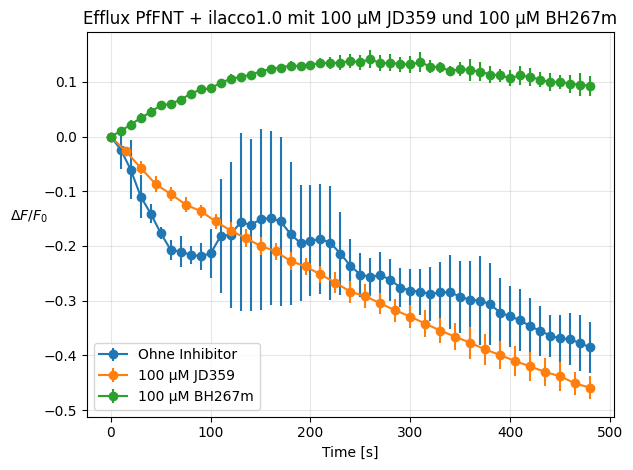

In [13]:
df_PfFNT = [
    E_PfFNT_ilacco1_0,
    E_PfFNT_100µM_JD359,
    E_PfFNT_100µM_BH267m]
label = ["Ohne Inhibitor","100 µM JD359","100 µM BH267m"]
for df,label in zip(df_PfFNT, label):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=label)
plt.title(f'Efflux PfFNT + ilacco1.0 mit 100 µM JD359 und 100 µM BH267m')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()

outpath = os.path.join('..', 'figures', 'Efflux PfFNT+ilacco1.0+Inhibitor.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()


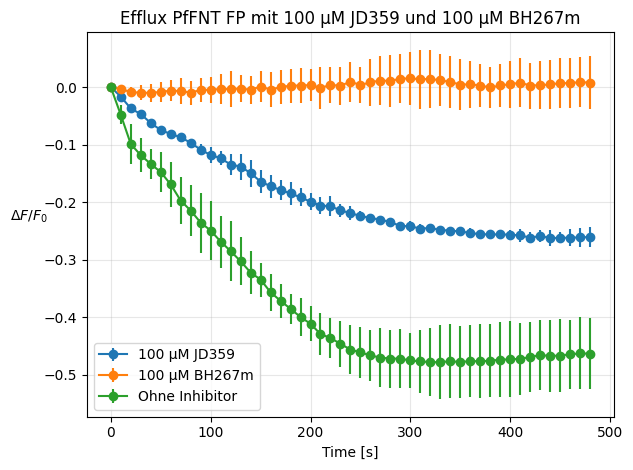

In [14]:
df_PfFNT_FP = [E_PfFNT_FP_100µM_JD359,
                E_PfFNT_FP_100µM_BH267m,
                E_PfFNT_FP]
label_FP = ["100 µM JD359","100 µM BH267m","Ohne Inhibitor"]
for df, lbl in zip(df_PfFNT_FP, label_FP):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=lbl)

plt.title(f'Efflux PfFNT FP mit 100 µM JD359 und 100 µM BH267m')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

outpath = os.path.join('..', 'figures', 'Efflux PfFNTi-lacco1.0(FP)+Inhibitor.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()